<a href="https://colab.research.google.com/github/tamer017/Image-compression/blob/main/Image_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**I-*Import* Dependencies** 

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()
# plt.style.use('fivethirtyeight')
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# **II - Read Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/color_space.csv")

In [ ]:
df.head()

,Name,Rgb
0,Absolute Zero,"(0, 72, 186)"
1,Acid Green,"(176, 191, 26)"
2,Alice Blue,"(240, 248, 255)"
3,Alizarin,"(227, 38, 54)"
4,Amaranth,"(229, 43, 80)"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    986 non-null    object
 1   Rgb     986 non-null    object
dtypes: object(2)
memory usage: 15.5+ KB


# **III- Data preprocessing**

## **III - 1 Convert the RGB tuple into Red, Green, Blue separate columns**

In [ ]:
def convert_to_rgp(df):
  color=df["Rgb"][1:-1]
  color=color.split(",")
  r,g,b=color
  df["Red"]=int(r)
  df["Green"]=int(g)
  df["Blue"]=int(b)
  return df

## **III - 2 Drop the other columns after cereating the Red, Green, Blue columns**

In [ ]:
df=df.apply(convert_to_rgp,axis=1)
df.drop(["Name","Rgb"],axis=1,inplace=True)

In [ ]:
df.head()

,Red,Green,Blue
0,0,72,186
1,176,191,26
2,240,248,255
3,227,38,54
4,229,43,80


## **III - 3 Divide by 255 so that all values are in the range 0 - 1**

In [ ]:
df/=255

# **IV - Model Creation**

## **IV -1 Find the number of clusters using Elbow method**

In [ ]:
costs=[]
for k in range(2,30):
  kmeans = KMeans(n_clusters=k, random_state=0).fit(df)
  costs.append(kmeans.inertia_)

Text(0.5, 1.0, 'K vs J')

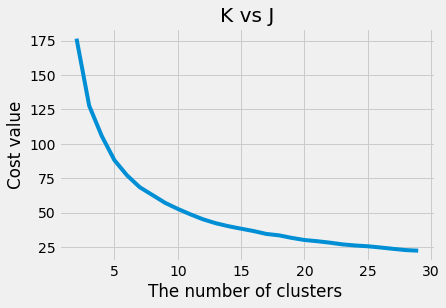

In [ ]:
k_vs_J=pd.DataFrame()
k_vs_J["K_number of clusters"]=np.arange(2,30,1)
k_vs_J["The costs"]=np.array(costs)
plt.plot(k_vs_J["K_number of clusters"],k_vs_J["The costs"])
plt.ylabel("Cost value")
plt.xlabel("The number of clusters ")
plt.title("K vs J")

In [ ]:
# since this curve is very smooth and we cannot pick the elbow so we will use 16 for example to be more realistic for the images
kmeans = KMeans(n_clusters=16, random_state=0).fit(df)

# **V - Visualize the test images images**

Text(0.5, 1.0, 'Zebra')

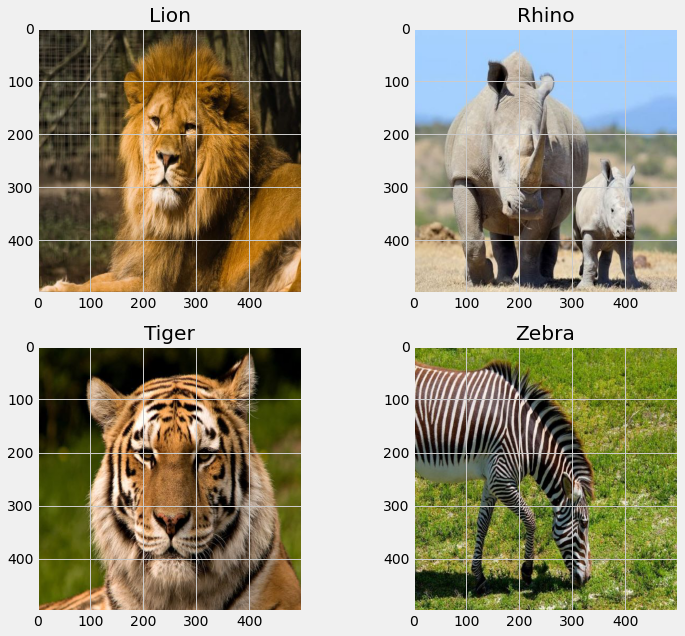

In [ ]:
from matplotlib import image as mpimg
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(11, 10))

rows = 2
columns = 2

# reading images
Image1 = mpimg.imread('/content/drive/MyDrive/test_img/Lion.jpg')
Image2 = mpimg.imread('/content/drive/MyDrive/test_img/Rhino.jpg')
Image3 = mpimg.imread('/content/drive/MyDrive/test_img/Tiger.jpg')
Image4 = mpimg.imread('/content/drive/MyDrive/test_img/Zebra.jpg')

fig.add_subplot(rows, columns, 1)

plt.imshow(Image1)
plt.title("Lion")

fig.add_subplot(rows, columns, 2)

plt.imshow(Image2)
plt.title("Rhino")

fig.add_subplot(rows, columns, 3)

plt.imshow(Image3)
plt.title("Tiger")

fig.add_subplot(rows, columns, 4)

plt.imshow(Image4)
plt.title("Zebra")


## **VI - Test the model**

## **VI - 1 Reshape the original images**

In [ ]:
Image1=Image1.reshape((Image1.shape[0]*Image1.shape[1],Image1.shape[2]))
Image2=Image2.reshape((Image2.shape[0]*Image2.shape[1],Image2.shape[2]))
Image3=Image3.reshape((Image3.shape[0]*Image3.shape[1],Image3.shape[2]))
Image4=Image4.reshape((Image4.shape[0]*Image4.shape[1],Image4.shape[2]))

## **VI - 2 predicted centroids for each image**

In [ ]:
clusters1=kmeans.predict(Image1/255)
clusters2=kmeans.predict(Image2/255)
clusters3=kmeans.predict(Image3/255)
clusters4=kmeans.predict(Image4/255)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


## **VI - 3 Predict the images**

In [ ]:
predicted1=kmeans.cluster_centers_[clusters1]
predicted2=kmeans.cluster_centers_[clusters2]
predicted3=kmeans.cluster_centers_[clusters3]
predicted4=kmeans.cluster_centers_[clusters4]

## **VI - 4 Reshape the predicted and the original images**

In [ ]:
Image1=Image1.reshape(500,500,Image1.shape[1])
Image2=Image2.reshape(500,500,Image2.shape[1])
Image3=Image3.reshape(500,500,Image3.shape[1])
Image4=Image4.reshape(500,500,Image4.shape[1])
predicted1=predicted1.reshape(500,500,predicted1.shape[1])
predicted2=predicted2.reshape(500,500,predicted2.shape[1])
predicted3=predicted3.reshape(500,500,predicted3.shape[1])
predicted4=predicted4.reshape(500,500,predicted4.shape[1])

Text(0.5, 1.0, 'compressed Zebra image')

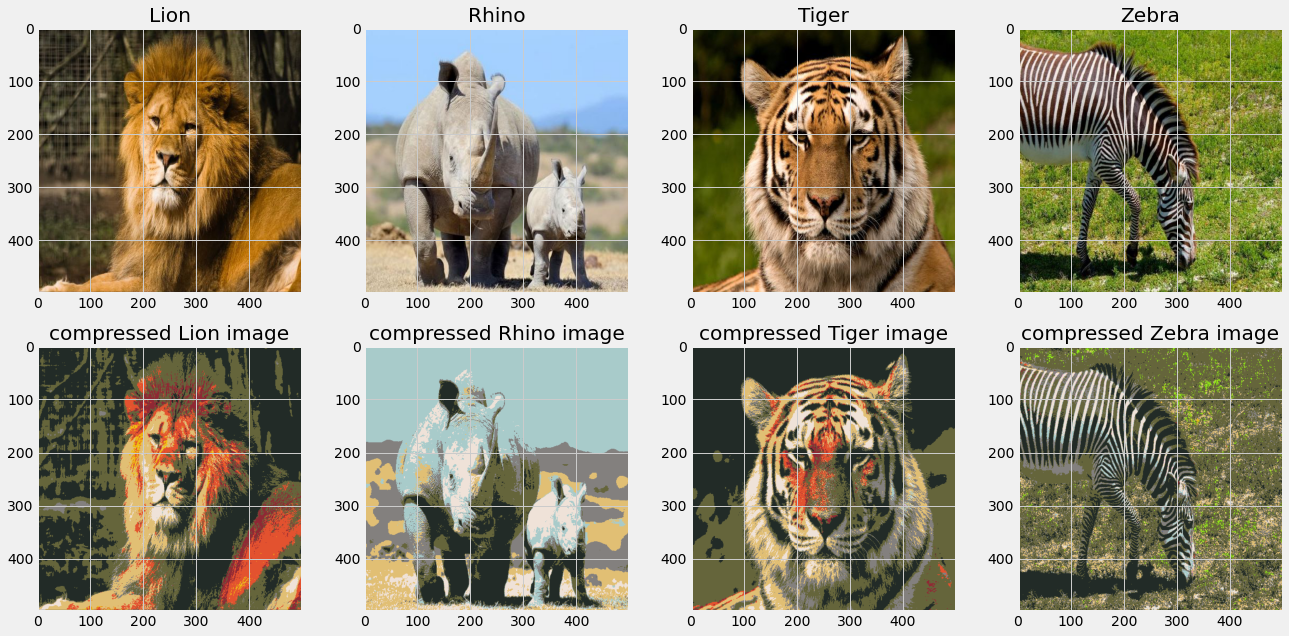

In [ ]:
from matplotlib import image as mpimg
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(20, 10))

rows = 2
columns = 4


fig.add_subplot(rows, columns, 1)

plt.imshow(Image1)
plt.title("Lion")

fig.add_subplot(rows, columns, 5)

plt.imshow(predicted1)
plt.title("compressed Lion image")

fig.add_subplot(rows, columns, 2)

plt.imshow(Image2)
plt.title("Rhino")

fig.add_subplot(rows, columns, 6)

plt.imshow(predicted2)
plt.title("compressed Rhino image")

fig.add_subplot(rows, columns, 3)

plt.imshow(Image3)
plt.title("Tiger")

fig.add_subplot(rows, columns, 7)

plt.imshow(predicted3)
plt.title("compressed Tiger image")

fig.add_subplot(rows, columns, 4)

plt.imshow(Image4)
plt.title("Zebra")

fig.add_subplot(rows, columns, 8)

plt.imshow(predicted4)
plt.title("compressed Zebra image")